In [1]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()

In [14]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
    
transcript = pd.read_csv('/Users/fahadahmad/Desktop/Semester 3/Software project/export_cleanNew826.csv')
transcript = transcript.dropna()

transcript = transcript.drop_duplicates('text', keep='first')

#Excluding texts which are less than 20 words in length
#transcript = transcript[transcript.text.str.split().str.len()>10]
#Excluding 3rd category of videos as its content is not quite relevant to 5G -- Optional to understand the pattern
#transcript = transcript[transcript["label"]==2]
transcript = transcript.reset_index()
transcript = transcript.drop(columns = ['Unnamed: 0','name'])

transcript

,index,text,label
0,0,noticed lot hate towards russian people due go...,0
1,1,metal bar,0
2,2,let talk russia thing really need explaining a...,0
3,3,would right ukraine president putin us n word ...,0
4,4,boo boo oh ooh ooh ooh ooh called get baby lul...,0
...,...,...,...
747,821,titleist thicker remand chin tiny nothing though,2
748,822,yeah thanks,2
749,823,open column saw,2
750,824,walking,2


In [35]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(transcript.text)]

#instantiate model
model = Doc2Vec(vector_size=32, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)
#generate vectors
card2vec = [model.infer_vector((transcript['text'][i].split(' '))) 
            for i in range(0,len(transcript['text']))]
print(card2vec)



[array([ 0.1335718 , -0.32950285,  0.6214978 ,  1.3066933 , -0.29677215,
       -0.3081924 , -1.2786573 , -0.2162604 , -0.26559445, -0.2854805 ,
        0.11613844, -0.03739469, -0.5384392 , -0.25936642, -0.20419885,
       -0.35294616, -0.03098561,  0.8310273 ,  0.1724101 ,  0.54502755,
        0.9354516 ,  0.8892077 ,  0.4444845 ,  0.21823929,  0.29500315,
        0.35538572, -0.7569654 , -0.33685094, -0.13128826, -0.297645  ,
       -0.8078239 ,  0.05424962], dtype=float32), array([ 0.00359356,  0.07308761,  0.04002042,  0.26462507,  0.11501959,
       -0.08865175,  0.00400934, -0.00657375, -0.19760707,  0.09042643,
        0.09072441,  0.06830736,  0.23952845, -0.06210096, -0.01963289,
        0.3068491 , -0.09794042,  0.25103247,  0.08769   ,  0.14338425,
        0.24020553,  0.14833774, -0.05351379, -0.07786552, -0.00971807,
       -0.08392261, -0.27520314,  0.0991575 ,  0.02172779,  0.02695764,
       -0.19787806, -0.18761721], dtype=float32), array([-0.9605472 ,  1.3792958 ,  3

In [36]:
len(card2vec[0])

32

Predicted Cluster labels

[0 0 1 2 0 2 2 2 2 2 2 2 1 0 0 0 2 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0
 2 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 2 0 2 2 0 2 2 0 2 0 0 0 2
 0 2 2 2 2 0 2 2 0 0 0 2 0 2 0 0 2 0 2 0 2 0 0 0 2 1 2 0 2 0 0 0 0 0 0 2 0
 0 0 2 0 0 0 2 0 2 2 0 2 2 2 0 0 0 0 2 2 0 0 2 0 2 2 0 0 2 0 0 0 2 2 0 0 2
 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 1 0 2 2 1 0 2 1 0 0 1 1 0 2 0 2 2 2 2 0 1 1 0 1 1 1 0 1 2 1 1 1 0 0 0 1 0
 2 0 2 0 0 2 0 0 0 2 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 2 0
 2 0 1 0 0 0 2 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 2 0 0 0 1 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 2 2 0 0 0 0 0 2 0 0 2 1 0 1 1 2 0 0 0 2 2 0 0 0 0 1 0 2 2 0 0 2
 0 2 2 1 1 1 0 2 2 1 1 0 2 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 2 2 0 0 0 2 1 1 2
 1 0 1 0 1 0 0 0 1 0 1 0 2 1 0 2 1 1 0 2 0 0 2 1 0 0 1 0 2 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 0 0 0 2 1 2 1 0 0 0 1 0 0 2 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0

<AxesSubplot:>

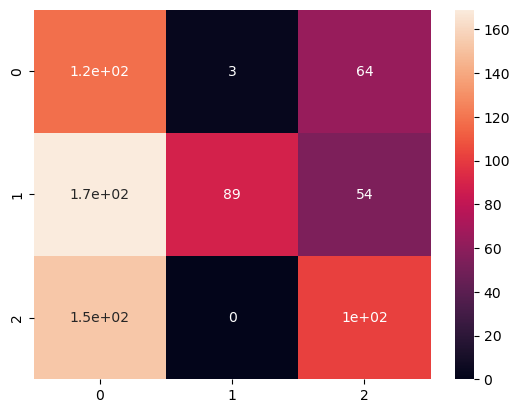

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


kmeans = KMeans(n_clusters=3)
kmeans.fit(card2vec)
clusters = kmeans.labels_
print("Predicted Cluster labels\n")
print(clusters)

print("\nground truth\n")
print(np.array(transcript['label']))

print("confusion matrix")
cf_matrix = confusion_matrix(transcript['label'], clusters)
sns.heatmap(cf_matrix, annot=True)


In [38]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid


clustering = DBSCAN(eps=4, min_samples=9).fit(card2vec)
print(clustering.labels_)


[ 0  0 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1 -1  0 -1
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0 -1  0  0 -1  0 -1  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0
  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1
  0  0  0  0 -1  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1  0  0
 -1  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0  0  0 -1 -1  0 -1  0 -1 -1
 -1  0  0  0 -1  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0
  0  0 -1 -1 -1  0 -1  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1  0  0 -1  0  0  0 -1 -1  0  0 -1  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0 -1 -1  0 -1  0  0  0  0  0  0

### Neglecting the DBScan approach as the document embeddings generated are scattered in space which this algorithm labels it as outlier

In [39]:

from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(card2vec)
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]


# assign clusters and pca vectors to our dataframe 
transcript['x0'] = x0
transcript['x1'] = x1

In [40]:
transcript['x0'] = np.array(card2vec)[:,0]
transcript['x1'] = np.array(card2vec)[:,1]

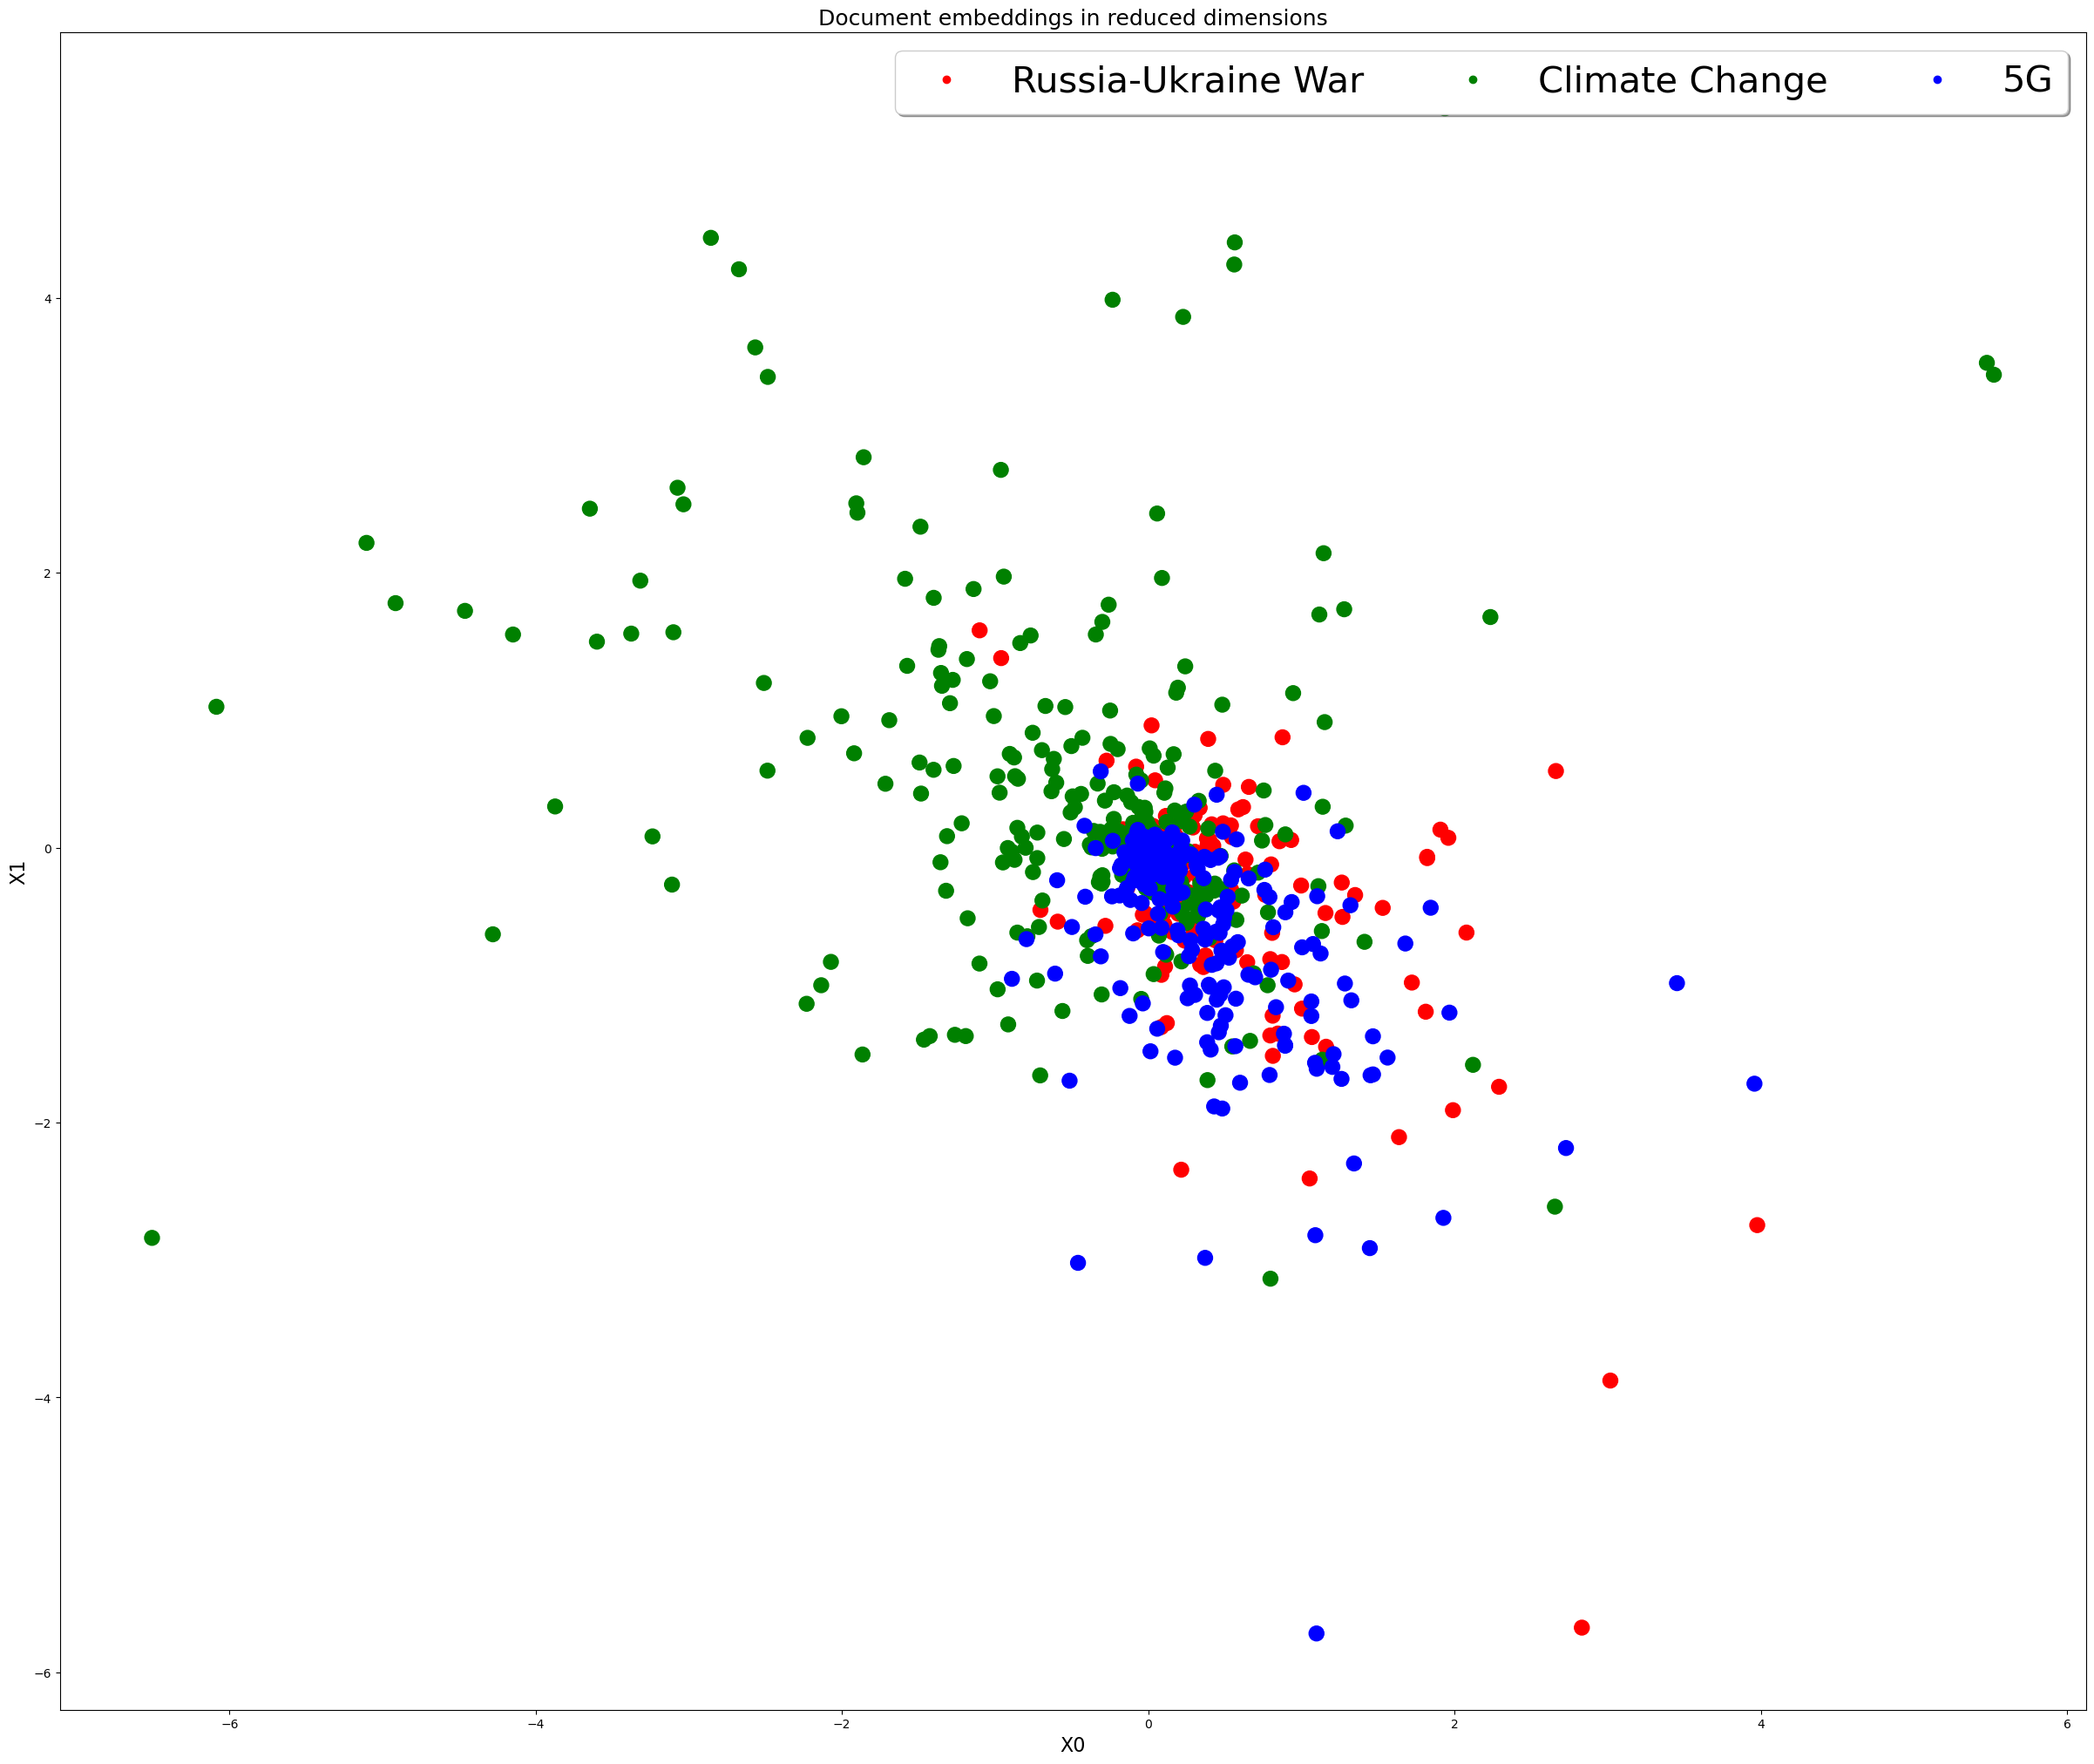

In [41]:
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib

def plotlabel(xvar, yvar, label):
    ax.text(xvar+0.002, yvar, label)
        
colors = ['red','green','blue']

# set image size
plt.figure(figsize=(30, 25))
# set a title
plt.title("Document embeddings in reduced dimensions", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data

scatter = plt.scatter(transcript['x0'], transcript['x1'], c=transcript['label'], cmap=matplotlib.colors.ListedColormap(colors), s = 150)


plt.legend(handles = scatter.legend_elements()[0], labels=['Russia-Ukraine War','Climate Change','5G'], fancybox=True, shadow=True, ncol=4, loc='upper right', fontsize="30")
plt.show()